In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("spam_Emails_data.csv", sep = ',')

In [3]:
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [5]:
data.isnull().sum()

label    0
text     2
dtype: int64

In [6]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [7]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
data['text'] = data['text'].str.lower()

data['label'] = LabelEncoder().fit_transform(data['label'])

In [10]:
X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.preprocessing import StandardScaler

vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# MultinomialNB

In [13]:
import time
start_time = time.time()

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 1.6337916851043701 seconds


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_pred = classifier.predict(X_test_vectorized)
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

In [15]:
print(f"Accuracy: {accuracy}")

print(f"Confusion Matrix:")
print(cm)

print(f"Classification Report:")
print(report)

Accuracy: 0.9643796750064483
Confusion Matrix:
[[20331   199]
 [ 1182 17058]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20530
           1       0.99      0.94      0.96     18240

    accuracy                           0.96     38770
   macro avg       0.97      0.96      0.96     38770
weighted avg       0.97      0.96      0.96     38770



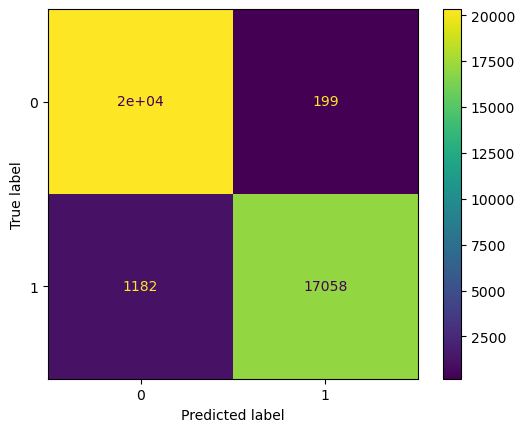

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [18]:
labels = data['label']
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = labels[0:1000]

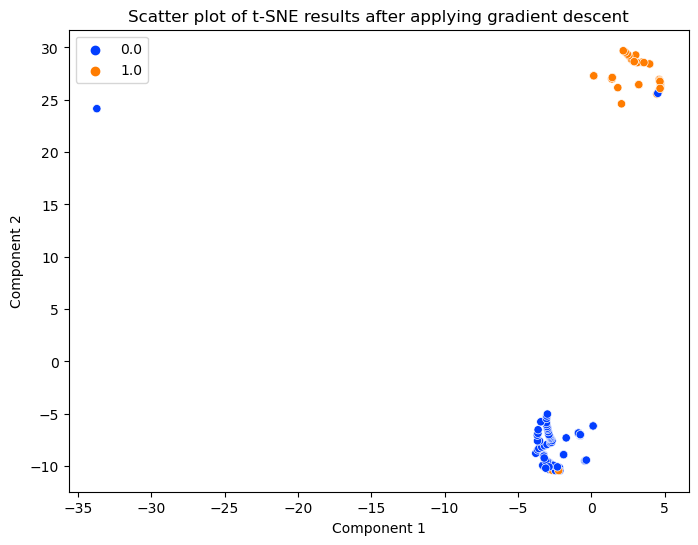

In [19]:
model1 = MultinomialNB()
model1.fit(data_1000, labels_1000)

# Get the model's predictions or transformed features (replace with your features)
transformed_data = model1.predict_proba(data_1000)

# Configure and fit t-SNE with init="random"
tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(transformed_data)

# Create a new DataFrame for the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter plot of t-SNE results after applying gradient descent")
plt.legend()
plt.show()

# BernoulliNB

In [20]:
start_time = time.time()

classifier_bernoulli = BernoulliNB()
classifier_bernoulli.fit(X_train_vectorized, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

y_pred_bernoulli = classifier_bernoulli.predict(X_test_vectorized)

accuracy_bernoulli = accuracy_score(Y_test, y_pred_bernoulli)
confusion_matrix_bernoulli = confusion_matrix(Y_test, y_pred_bernoulli)
report_bernoulli = classification_report(Y_test, y_pred_bernoulli)

print(f"Accuracy: {accuracy_bernoulli}")

print(f"Confusion Matrix:")
print(confusion_matrix_bernoulli)

print(f"Classification Report:")
print(report_bernoulli)

Training time: 1.7360148429870605 seconds
Accuracy: 0.8890895021924168
Confusion Matrix:
[[17090  3440]
 [  860 17380]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     20530
           1       0.83      0.95      0.89     18240

    accuracy                           0.89     38770
   macro avg       0.89      0.89      0.89     38770
weighted avg       0.90      0.89      0.89     38770



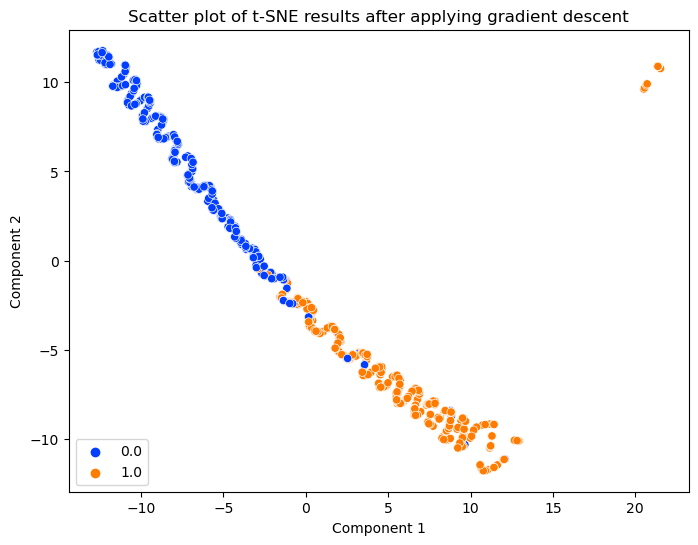

In [21]:
model2 = BernoulliNB()
model2.fit(data_1000, labels_1000)

# Get the model's predictions or transformed features (replace with your features)
transformed_data = model2.predict_proba(data_1000)

# Configure and fit t-SNE with init="random"
tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(transformed_data)

# Create a new DataFrame for the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter plot of t-SNE results after applying gradient descent")
plt.legend()
plt.show()

# ComplementNB

In [23]:
start_time = time.time()

classifier_complement = ComplementNB()
classifier_complement.fit(X_train_vectorized, Y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

y_pred_complement = classifier_complement.predict(X_test_vectorized)

accuracy_complement = accuracy_score(Y_test, y_pred_complement)
confusion_matrix_complement = confusion_matrix(Y_test, y_pred_complement)
report_complement = classification_report(Y_test, y_pred_complement)

print(f"Accuracy: {accuracy_complement}")

print(f"Confusion Matrix:")
print(confusion_matrix_complement)

print(f"Classification Report:")
print(report_complement)

Training time: 2.026372194290161 seconds
Accuracy: 0.9661078153211246
Confusion Matrix:
[[20311   219]
 [ 1095 17145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20530
           1       0.99      0.94      0.96     18240

    accuracy                           0.97     38770
   macro avg       0.97      0.96      0.97     38770
weighted avg       0.97      0.97      0.97     38770



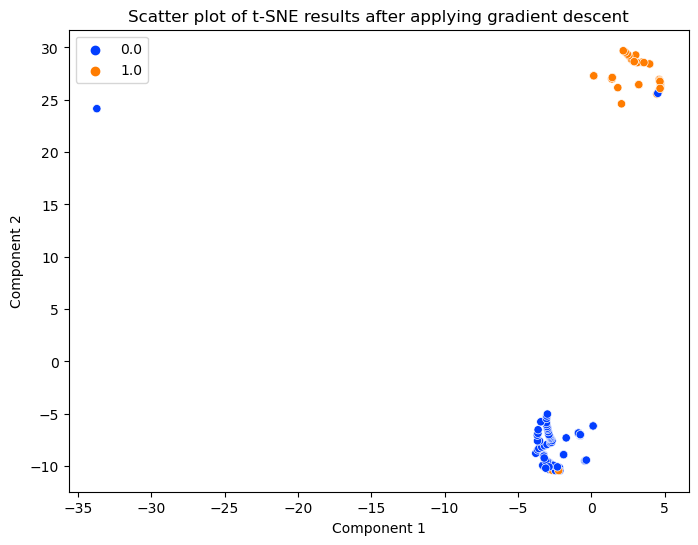

In [24]:
model3 = ComplementNB()
model3.fit(data_1000, labels_1000)

# Get the model's predictions or transformed features (replace with your features)
transformed_data = model3.predict_proba(data_1000)

# Configure and fit t-SNE with init="random"
tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(transformed_data)

# Create a new DataFrame for the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter plot of t-SNE results after applying gradient descent")
plt.legend()
plt.show()